In [3]:
from openml import datasets, tasks, runs, flows, setups
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [4]:
# Find top sklearn.pipeline Flow (with most number of runs)
flowsJson = flows.list_flows()
flowList = pd.DataFrame(flowsJson).transpose()
sklearnPipelineFlows = flowList.loc[flowList.full_name.str.startswith('sklearn.pipeline')]
sklearnRuns = pd.DataFrame(runs.list_runs(flow=sklearnPipelineFlows.id)).transpose()
sklearnRuns.groupby('flow_id').agg('count').sort_values('run_id', ascending = 0)
topFlows = sklearnRuns.groupby('flow_id').agg('count').sort_values('run_id', ascending = 0)[0:100] # flow_id = 5909

In [5]:
# Count the number of runs for each flow and task and provide a sample run
top100FlowRuns = pd.DataFrame(runs.list_runs(flow=topFlows.index)).transpose()
f = {'run_id':['first','size']}
allRunsTop100Flows = top100FlowRuns.groupby(['flow_id','task_id']).agg(f).reset_index()
allRunsTop100Flows.columns = ['flow', 'task','run', 'count']
df = allRunsTop100Flows.sort_values('count', ascending=False).reset_index()
del df['index']

In [37]:
df.head()

,flow,task,run,count
0,5983,49,1973326,32
1,5591,59,1849019,24
2,5979,15,1924173,21
3,5804,31,1860342,18
4,6048,59,2012884,15


Top 100 Flows have been executed on 131 unique tasks. 
Making a total 635 unique Flow (pipeline) + task combination.
Figure below shows how many times the same flows were executed on the same tasks.

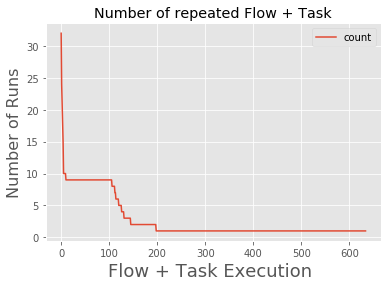

In [43]:
plt.plot(df['count'])
plt.xlabel('Flow + Task Execution ', fontsize=18)
plt.ylabel('Number of Runs', fontsize=16)
plt.legend()
plt.title("Number of repeated Flow + Task")
plt.show()
plt.savefig('repeated-task-occurence.png', bbox_inches='tight')

In [45]:
df['count'].max()

32